# Hierarchical Clustering

## Training Set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [ ]:
# Load the dataset
df_players = pd.read_parquet('../data/processed/df_players.parquet')
df_players

,NombreCompleto,Puntos_suma,ReboteDefensivo_suma,ReboteOfensivo_suma,RebotesTotales_suma,Asistencias_suma,Recuperaciones_suma,Perdidas_suma,TaponCometido_suma,TaponRecibido_suma,FaltaCometida_suma,FaltaRecibida_suma,Valoracion_suma,TirosDosAciertos_suma,TirosDosFallos_suma,TirosTresAciertos_suma,TirosTresFallos_suma,TirosLibresAciertos_suma,TirosLibresFallos_suma,plus_minus_suma,plays_consumidas_suma,plays_jugadas_suma,rebote_of_disp_suma,rebote_def_disp_suma,puntos_q4_y_prorroga_suma,puntos_clutch_suma,min_q4_suma,min_q4_y_prorroga_suma,min_clutch_suma,posesiones_finalizadas_suma,TiempoJuego_seg_suma,TiempoJuego_min_suma,IdJugador,IdClub,IdEquipo,Nombre,TiempoJuego,CincoInicial,equipo,partido_key,nacionalidad,rival,fecha_hora,Puntos_prom_40min,ReboteDefensivo_prom_40min,ReboteOfensivo_prom_40min,RebotesTotales_prom_40min,Asistencias_prom_40min,Recuperaciones_prom_40min,Perdidas_prom_40min,TaponCometido_prom_40min,TaponRecibido_prom_40min,FaltaCometida_prom_40min,FaltaRecibida_prom_40min,Valoracion_prom_40min,TirosDosAciertos_prom_40min,TirosDosFallos_prom_40min,TirosTresAciertos_prom_40min,TirosTresFallos_prom_40min,TirosLibresAciertos_prom_40min,TirosLibresFallos_prom_40min,plus_minus_prom_40min,plays_consumidas_prom_40min,plays_jugadas_prom_40min,rebote_of_disp_prom_40min,rebote_def_disp_prom_40min,min_q4_prom_40min,min_q4_y_prorroga_prom_40min,min_clutch_prom_40min,posesiones_finalizadas_prom_40min,TiempoJuego_seg_prom_40min,TiempoJuego_min_prom_40min,TirosDeCampo_suma,TOV%,eFG%,ORB%,DRB%,RB%,FTr,3PT%,TS%,USG%,AST/TOVr,game_score_suma,ORTG,puntos_clutch_prom_5min,puntos_q4pror_prom_10min,CantidadPartidosJugados,game_score_prom,MinutosJugadosPorPartido
0,"AALIYA, LEE ABRAHAM",261.0,82.0,42.0,124.0,18.0,18.0,25.0,25.0,4.0,60.0,51.0,252.0,79.0,51.0,23.0,74.0,34.0,31.0,98.0,278.0,1508.0,663.0,683.0,104.0,2.0,202.59,202.59,15.06,238.60,37472.0,624.533333,326138,1790,69616,"AALIYA, L.",21:02,False,INSTITUTO,INSTITUTO vs QUIMSA (002/12/2024 22:10),Argentino,QUIMSA,02/12/2024,16.716482,5.251921,2.690009,7.941930,1.152861,1.152861,1.601196,1.601196,0.256191,3.842869,3.266439,16.140051,5.059778,3.266439,1.473100,4.739539,2.177626,1.985482,6.276687,17.805295,96.584116,42.463706,43.744663,12.975448,12.975448,0.964560,15.281810,2400.0,40.0,227.0,8.992806,50.000000,6.334842,12.005857,9.212481,0.149780,23.711340,51.056338,18.435013,0.720000,233.6,109.388097,0.664011,5.133521,34,6.870588,18.368627
1,"ACEVEDO, MAXIMILIANO JUNIORS",2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,-6.0,4.0,26.0,15.0,10.0,2.0,0.0,10.79,10.79,1.32,3.00,694.0,11.566667,149814,2305,69510,"ACEVEDO, M.",00:00,False,OBERA,OBERA vs RIACHUELO (LR) (001/12/2024 21:00),Argentino,RIACHUELO,01/12/2024,6.916427,3.458213,3.458213,6.916427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.458213,3.458213,6.916427,0.000000,3.458213,0.000000,0.000000,-20.749280,13.832853,89.913545,51.873199,34.582133,37.314121,37.314121,4.564841,10.374640,2400.0,40.0,4.0,0.000000,25.000000,6.666667,10.000000,8.000000,0.000000,0.000000,25.000000,15.384615,NaN,1.8,66.666667,0.000000,1.853568,4,0.450000,2.891667
2,"ACEVEDO, SEBASTIAN IGNACIO",285.0,104.0,24.0,128.0,24.0,26.0,30.0,1.0,5.0,84.0,65.0,266.0,55.0,59.0,43.0,76.0,46.0,9.0,-12.0,287.0,2047.0,992.0,828.0,64.0,12.0,242.03,249.60,44.73,263.20,50524.0,842.066667,209965,1426,69281,"ACEVEDO, S.",21:53,True,SAN MARTIN (C),SAN MARTIN (C) vs GIMNASIA (CR) (004/12/2024 2...,Argentino,GIMNASIA,04/12/2024,13.538120,4.940226,1.140052,6.080279,1.140052,1.235057,1.425065,0.047502,0.237511,3.990183,3.087642,12.635579,2.612620,2.802628,2.042594,3.610165,2.185100,0.427520,-0.570026,13.633125,97.236957,47.122160,39.331803,11.496952,11.856543,2.124772,12.502573,2400.0,40.0,233.0,10.452962,51.287554,2.419355,12.560386,7.032967,0.197425,36.134454,55.404355,14.020518,0.800000,239.4,108.282675,1.341382,2.564103,38,6.300000,22.159649
3,"ACTIS, JOAQUIN MATIAS",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,

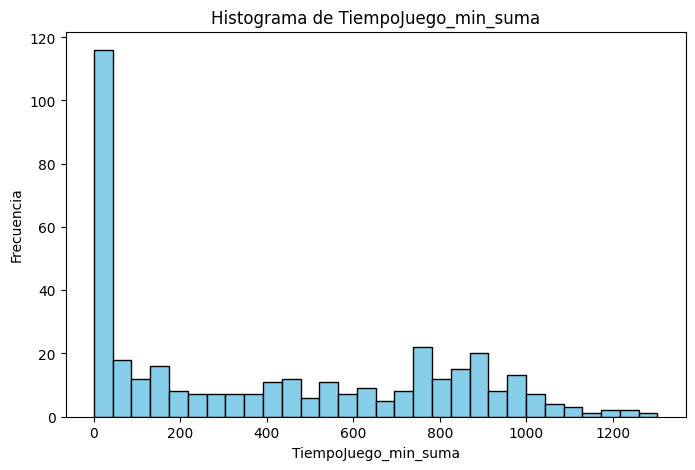

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df_players['TiempoJuego_min_suma'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('TiempoJuego_min_suma')
plt.ylabel('Frecuencia')
plt.title('Histograma de TiempoJuego_min_suma')
plt.show()

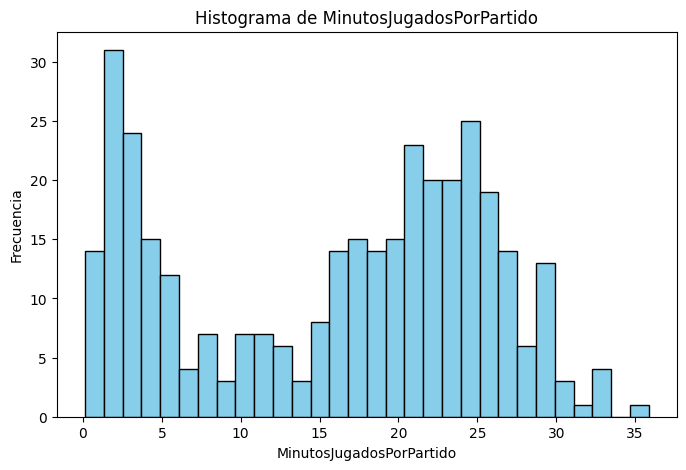

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df_players['MinutosJugadosPorPartido'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('MinutosJugadosPorPartido')
plt.ylabel('Frecuencia')
plt.title('Histograma de MinutosJugadosPorPartido')
plt.show()

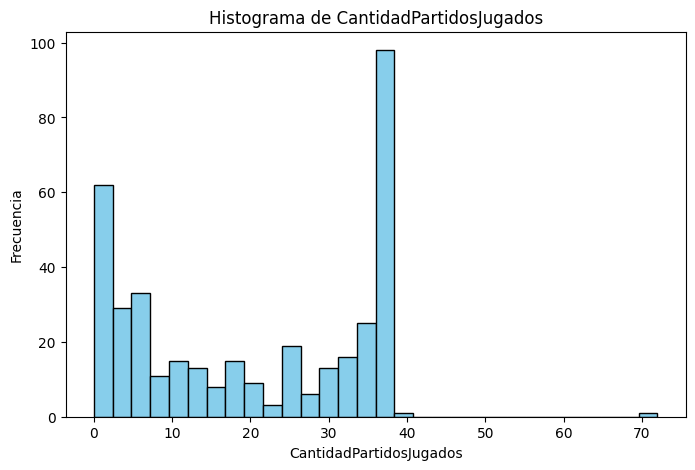

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df_players['CantidadPartidosJugados'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('CantidadPartidosJugados')
plt.ylabel('Frecuencia')
plt.title('Histograma de CantidadPartidosJugados')
plt.show()

In [ ]:
df_players.shape

(377, 90)

In [ ]:
df_players[
    ((df_players['MinutosJugadosPorPartido'] > 3) &
     (df_players['CantidadPartidosJugados'] > 5)) |
    (df_players['TiempoJuego_min_suma'] > 60)
].shape

(268, 90)

Los criterio para mantener a los jugadores en el conjunto de entrenamiento serán:
- Jugadores que hayan disputado más de 5 partido 
- Jugadores que hayan disputado más de 3 minutos por partido en promedio

O bien:
- Jugadores que hayan jugado mas de 60 minutos durante toda la temporada

In [ ]:
df_train = df_players[
    ((df_players['MinutosJugadosPorPartido'] > 3) &
     (df_players['CantidadPartidosJugados'] > 5)) |
    (df_players['TiempoJuego_min_suma'] > 60)
]


In [ ]:
df_train.columns

Index(['NombreCompleto', 'Puntos_suma', 'ReboteDefensivo_suma',
       'ReboteOfensivo_suma', 'RebotesTotales_suma', 'Asistencias_suma',
       'Recuperaciones_suma', 'Perdidas_suma', 'TaponCometido_suma',
       'TaponRecibido_suma', 'FaltaCometida_suma', 'FaltaRecibida_suma',
       'Valoracion_suma', 'TirosDosAciertos_suma', 'TirosDosFallos_suma',
       'TirosTresAciertos_suma', 'TirosTresFallos_suma',
       'TirosLibresAciertos_suma', 'TirosLibresFallos_suma', 'plus_minus_suma',
       'plays_consumidas_suma', 'plays_jugadas_suma', 'rebote_of_disp_suma',
       'rebote_def_disp_suma', 'puntos_q4_y_prorroga_suma',
       'puntos_clutch_suma', 'min_q4_suma', 'min_q4_y_prorroga_suma',
       'min_clutch_suma', 'posesiones_finalizadas_suma',
       'TiempoJuego_seg_suma', 'TiempoJuego_min_suma', 'IdJugador', 'IdClub',
       'IdEquipo', 'Nombre', 'TiempoJuego', 'CincoInicial', 'equipo',
       'partido_key', 'nacionalidad', 'rival', 'fecha_hora',
       'Puntos_prom_40min', 'ReboteDe

In [ ]:
variables_standar = ['NombreCompleto', 'Nombre', 'nacionalidad', 'CincoInicial', 'equipo', 
'Puntos_prom_40min','ReboteDefensivo_prom_40min', 'ReboteOfensivo_prom_40min',
'Asistencias_prom_40min','Recuperaciones_prom_40min', 'Perdidas_prom_40min',
'TaponCometido_prom_40min', 'TaponRecibido_prom_40min',
'FaltaCometida_prom_40min', 'FaltaRecibida_prom_40min',
'Valoracion_prom_40min', 'TirosDosAciertos_prom_40min',
'TirosDosFallos_prom_40min', 'TirosTresAciertos_prom_40min',
'TirosTresFallos_prom_40min', 'TirosLibresAciertos_prom_40min',
'TirosLibresFallos_prom_40min', 'plus_minus_prom_40min',
'plays_consumidas_prom_40min', 'plays_jugadas_prom_40min',
'rebote_of_disp_prom_40min', 'rebote_def_disp_prom_40min',
'puntos_q4pror_prom_10min', 'puntos_clutch_prom_5min',
'puntos_q4_y_prorroga_suma', 'puntos_clutch_suma', 'min_q4_suma',
'min_q4_y_prorroga_suma', 'min_clutch_suma',
'posesiones_finalizadas_prom_40min', 
'TOV%', 'eFG%', 'ORB%', 'DRB%', 'RB%', 'FTr', '3PT%', 'TS%', 'USG%', 'AST/TOVr',
'CantidadPartidosJugados', 'game_score_prom','MinutosJugadosPorPartido']
df_train[variables_standar]

,NombreCompleto,Nombre,nacionalidad,CincoInicial,equipo,Puntos_prom_40min,ReboteDefensivo_prom_40min,ReboteOfensivo_prom_40min,Asistencias_prom_40min,Recuperaciones_prom_40min,Perdidas_prom_40min,TaponCometido_prom_40min,TaponRecibido_prom_40min,FaltaCometida_prom_40min,FaltaRecibida_prom_40min,Valoracion_prom_40min,TirosDosAciertos_prom_40min,TirosDosFallos_prom_40min,TirosTresAciertos_prom_40min,TirosTresFallos_prom_40min,TirosLibresAciertos_prom_40min,TirosLibresFallos_prom_40min,plus_minus_prom_40min,plays_consumidas_prom_40min,plays_jugadas_prom_40min,rebote_of_disp_prom_40min,rebote_def_disp_prom_40min,puntos_q4pror_prom_10min,puntos_clutch_prom_5min,puntos_q4_y_prorroga_suma,puntos_clutch_suma,min_q4_suma,min_q4_y_prorroga_suma,min_clutch_suma,posesiones_finalizadas_prom_40min,TOV%,eFG%,ORB%,DRB%,RB%,FTr,3PT%,TS%,USG%,AST/TOVr,CantidadPartidosJugados,game_score_prom,MinutosJugadosPorPartido
0,"AALIYA, LEE ABRAHAM","AALIYA, L.",Argentino,False,INSTITUTO,16.716482,5.251921,2.690009,1.152861,1.152861,1.601196,1.601196,0.256191,3.842869,3.266439,16.140051,5.059778,3.266439,1.473100,4.739539,2.177626,1.985482,6.276687,17.805295,96.584116,42.463706,43.744663,5.133521,0.664011,104.0,2.0,202.59,202.59,15.06,15.281810,8.992806,50.000000,6.334842,12.005857,9.212481,0.149780,23.711340,51.056338,18.435013,0.720000,34,6.870588,18.368627
2,"ACEVEDO, SEBASTIAN IGNACIO","ACEVEDO, S.",Argentino,True,SAN MARTIN (C),13.538120,4.940226,1.140052,1.140052,1.235057,1.425065,0.047502,0.237511,3.990183,3.087642,12.635579,2.612620,2.802628,2.042594,3.610165,2.185100,0.427520,-0.570026,13.633125,97.236957,47.122160,39.331803,2.564103,1.341382,64.0,12.0,242.03,249.60,44.73,12.502573,10.452962,51.287554,2.419355,12.560386,7.032967,0.197425,36.134454,55.404355,14.020518,0.800000,38,6.300000,22.159649
4,"ACUÑA, ROBERTO SANTIAGO","ACUÑA, R.",Argentino,False,INSTITUTO,12.969353,5.784453,2.983560,1.217780,0.974224,1.704891,0.669779,0.608890,4.810229,2.922671,14.491577,5.297341,3.592450,0.121778,0.913335,2.009336,1.400447,6.941344,13.091131,83.539679,36.472498,36.350721,3.387916,0.614628,48.0,2.0,141.68,141.68,16.27,10.146539,13.023256,55.214724,8.180301,15.912898,12.040134,0.202454,11.764706,56.757621,15.670554,0.714286,35,5.594286,18.769524
5,"AGUERRE, FEDERICO MATIAS","AGUERRE, F.",Argentino,True,RIACHUELO (LR),13.194345,7.453948,1.456519,1.585035,0.728259,1.370841,0.556904,0.171355,2.955876,3.212909,17.521062,2.184778,2.141939,2.184778,3.427103,2.270456,0.599743,3.084392,12.637441,77.024133,29.987148,38.554905,2.870323,0.860956,56.0,8.0,195.10,195.10,46.46,11.115808,10.847458,54.956897,4.857143,19.333333,13.000000,0.228448,38.931298,58.895518,16.407119,1.156250,36,8.366667,25.937037
6,"AGUIRRE, GUSTAVO NICOLAS","AGUIRRE, G.",Argentino,True,REGATAS (C),10.754585,6.478665,0.863822,3.844008,1.338924,1.900409,0.000000,0.129573,2.375511,3.196142,15.160077,2.289128,2.289128,1.554880,4.275919,1.511689,0.345529,0.691058,13.130095,85.302428,37.360304,39.951770,2.023121,2.074689,42.0,23.0,203.00,207.60,55.43,12.262818,14.473684,44.398340,2.312139,16.216216,9.497207,0.145228,26.666667,47.899354,15.392405,2.022727,34,7.641176,27.238725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,"WATSON, EARL OVREL","WATSON, E.",Estadounidense,False,ATENAS (C),9.504380,7.200288,5.184207,0.864035,1.728069,2.304092,0.288012,0.576023,2.880115,3.456138,13.536541,4.032161,6.624265,0.000000,0.000000,1.440058,2.304092,-4.608184,14.688588,111.172447,50.978039,48.385935,0.441696,0.000000,2.0,0.0,45.28,45.28,0.74,9.458298,15.686275,37.837838,10.169492,14.880952,12.463768,0.135135,NaN,38.623596,13.212435,0.375000,12,2.966667,11.573611
371,"WHELAN, GASTON","WHELAN, G.",Argentino,True,UNION (SF),19.985110,4.367607,0.727934,4.764662,1.389693,2.779386,0.066176,0.397055,3.904376,7.742576,23.624783,4.897014,3.970552,1.455869,2.713210,5.823476

In [ ]:
# Filtrar filas donde la columna 'Nombre' contiene 'SCHATTMANN' (insensible a mayúsculas)
df_players[df_players['NombreCompleto'].str.contains('DOS SANTOS', na=False, case=False)]

,NombreCompleto,Puntos_suma,ReboteDefensivo_suma,ReboteOfensivo_suma,RebotesTotales_suma,Asistencias_suma,Recuperaciones_suma,Perdidas_suma,TaponCometido_suma,TaponRecibido_suma,FaltaCometida_suma,FaltaRecibida_suma,Valoracion_suma,TirosDosAciertos_suma,TirosDosFallos_suma,TirosTresAciertos_suma,TirosTresFallos_suma,TirosLibresAciertos_suma,TirosLibresFallos_suma,plus_minus_suma,plays_consumidas_suma,plays_jugadas_suma,rebote_of_disp_suma,rebote_def_disp_suma,puntos_q4_y_prorroga_suma,puntos_clutch_suma,min_q4_suma,min_q4_y_prorroga_suma,min_clutch_suma,posesiones_finalizadas_suma,TiempoJuego_seg_suma,TiempoJuego_min_suma,IdJugador,IdClub,IdEquipo,Nombre,TiempoJuego,CincoInicial,equipo,partido_key,nacionalidad,rival,fecha_hora,Puntos_prom_40min,ReboteDefensivo_prom_40min,ReboteOfensivo_prom_40min,RebotesTotales_prom_40min,Asistencias_prom_40min,Recuperaciones_prom_40min,Perdidas_prom_40min,TaponCometido_prom_40min,TaponRecibido_prom_40min,FaltaCometida_prom_40min,FaltaRecibida_prom_40min,Valoracion_prom_40min,TirosDosAciertos_prom_40min,TirosDosFallos_prom_40min,TirosTresAciertos_prom_40min,TirosTresFallos_prom_40min,TirosLibresAciertos_prom_40min,TirosLibresFallos_prom_40min,plus_minus_prom_40min,plays_consumidas_prom_40min,plays_jugadas_prom_40min,rebote_of_disp_prom_40min,rebote_def_disp_prom_40min,min_q4_prom_40min,min_q4_y_prorroga_prom_40min,min_clutch_prom_40min,posesiones_finalizadas_prom_40min,TiempoJuego_seg_prom_40min,TiempoJuego_min_prom_40min,TirosDeCampo_suma,TOV%,eFG%,ORB%,DRB%,RB%,FTr,3PT%,TS%,USG%,AST/TOVr,game_score_suma,ORTG,puntos_clutch_prom_5min,puntos_q4pror_prom_10min,CantidadPartidosJugados,game_score_prom,MinutosJugadosPorPartido
138,"FRANCA DOS SANTOS, JOAO VITOR",231.0,79.0,31.0,110.0,4.0,4.0,7.0,14.0,4.0,24.0,95.0,324.0,75.0,50.0,2.0,9.0,75.0,40.0,19.0,194.0,757.0,340.0,357.0,55.0,2.0,70.92,70.92,5.88,162.6,20299.0,338.316667,326647,1882,69822,"FRANCA, J.",30:51,True,OLIMPICO (LB),OLIMPICO (LB) vs LA UNION FSA. (017/11/2024 22...,Brasileño,LA UNION FSA.,17/11/2024,27.31169,9.340362,3.665205,13.005567,0.47293,0.47293,0.827627,1.655254,0.47293,2.837578,11.23208,38.307306,8.867432,5.911621,0.236465,1.064092,8.867432,4.729297,2.246416,22.93709,89.501946,40.199025,42.208976,8.385044,8.385044,0.695207,19.224592,2400.0,40.0,136.0,3.608247,57.352941,9.117647,22.128852,15.781923,0.551471,18.181818,61.897106,25.627477,0.571429,219.6,142.066421,1.70068,7.755217,14,15.685714,24.165476
